In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn

# in jupyter notebook for inline plot display
%matplotlib inline

#Get the dataset from sklearn
from sklearn.datasets import load_wine
data = load_wine()

# prepare features and target for use
X= data.data
X = pd.DataFrame(X)
X.columns  = [x.capitalize() for x in data.feature_names]

y = data.target

Let’s take a look at the Yellowbrick routine first. I’ll instantiate a RandomForestClassifier() and a FeatureImportances() visualizer, then fit the visualizer and display the plot.

C:\Users\Sima\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


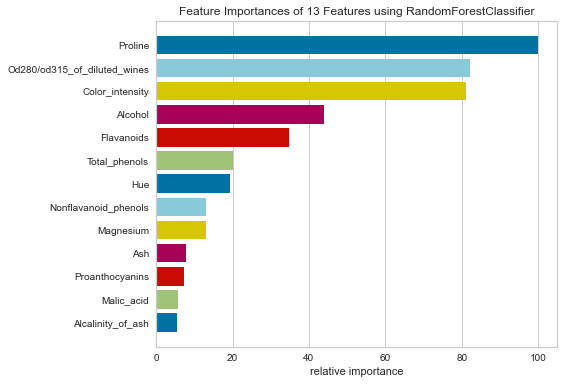

In [17]:
# import model and visualizer
from yellowbrick.model_selection import FeatureImportances
from sklearn.ensemble import RandomForestClassifier
from IPython import get_ipython


# instantiate model and visualizer
model= RandomForestClassifier(n_estimators = 10, random_state= 1)
visualizer = FeatureImportances(model)

#fir and display visulizer
visualizer.fit(X,y)
visualizer.show()

By hand plotting

In [19]:
model.fit(X,y)

RandomForestClassifier(n_estimators=10, random_state=1)

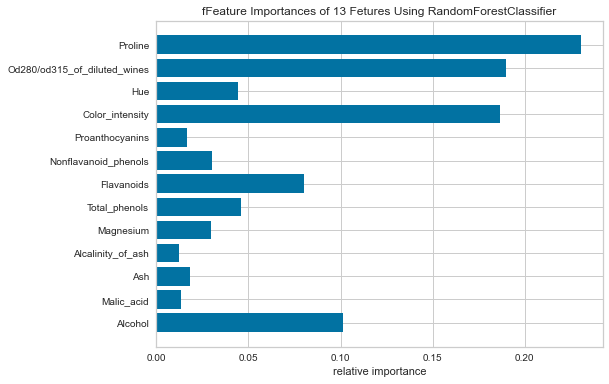

In [21]:
# plot feature importances
n_features = X.shape[1]
plt.figure(figsize=(8,6))
plt.barh(range(n_features),model.feature_importances_,align='center')
plt.yticks(np.arange(n_features),X.columns)
plt.xlabel("relative importance")
plt.title('fFeature Importances of 13 Fetures Using RandomForestClassifier')
plt.show()

Sort the elements and the plot

In [37]:
feature_importance = dict(zip(X.columns,model.feature_importances_)) 
feature_importance_sorted = dict(sorted(feature_importance.items(), key=lambda x: x[1]))

In [38]:
feature_importance_sorted

{'Alcalinity_of_ash': 0.012389256399833808,
 'Malic_acid': 0.013355510098675293,
 'Proanthocyanins': 0.016761221732119476,
 'Ash': 0.018118214141098276,
 'Magnesium': 0.029938560509817667,
 'Nonflavanoid_phenols': 0.030040049940661243,
 'Hue': 0.04463859313518967,
 'Total_phenols': 0.04624171152554043,
 'Flavanoids': 0.08011698613672935,
 'Alcohol': 0.10124608594673953,
 'Color_intensity': 0.186774000070817,
 'Od280/od315_of_diluted_wines': 0.18973675920862748,
 'Proline': 0.23064305115415087}

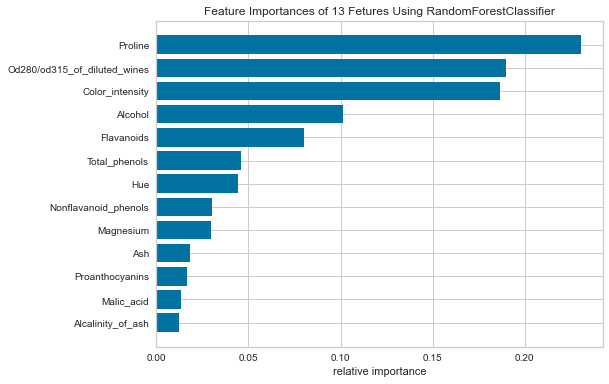

In [39]:
plt.figure(figsize=(8,6))
plt.barh(range(n_features),feature_importance_sorted.values(),align='center')
plt.yticks(np.arange(n_features),feature_importance_sorted.keys())
plt.xlabel("relative importance")
plt.title('Feature Importances of 13 Fetures Using RandomForestClassifier')
plt.show()

Note from the article writer: 
A quick but crucial note: see how I sorted the feature importances in ascending order? That’s because Matplotlib will plot them starting from the bottom of the plot. Take it from me, because I learned the hard way: if you want to display values in descending order (top-bottom), pass them to Matplotlib in ascending order.

### color -coded confusion metrics

C:\Users\Sima\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


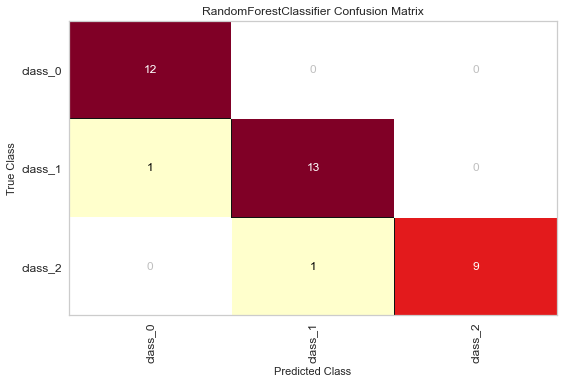

In [43]:
# import what we need
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ConfusionMatrix

# Split the data for validarion
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 123, stratify=y)
#instantiate model and visualizer
model = RandomForestClassifier(n_estimators=10, random_state=123)
matrix = ConfusionMatrix(model,classes = ['class_0','class_1','class_2'])

#fit, score and display
matrix.fit(X_train,y_train)
matrix.score(X_test,y_test)
matrix.show()

example 3 : t_SNE plot to show how classes of text overlap.



~~~python
# Import needed packages
from sklearn.feature_extraction.text import TfidfVectorizer
from yellowbrick.text import TSNEVisualizer
# Prepare the data
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(data.text)
y = data.target
# Plot t-SNE
tsne = TSNEVisualizer()
tsne.fit(X, y)
tsne.show()
~~~